Successfully loaded '/content/datafile.csv'!

--- First 5 rows of the cleaned dataset: ---
                       State                    District        Grade  \
0  Andaman & Nicobar Islands              South Andamans  Prachesta-1   
1  Andaman & Nicobar Islands  Middle And North\nAndamans  Prachesta-1   
2  Andaman & Nicobar Islands                    Nicobars  Prachesta-1   
3             Andhra Pradesh                Vizianagaram  Prachesta-1   
4             Andhra Pradesh                      Guntur  Prachesta-1   

   Overall  Outcome  ECT  IF&SE  SS&CP  DL  GP  
0      334      133   75     27     25  27  47  
1      322      138   73     25     25  19  43  
2      303      130   72     29     24  18  30  
3      341      131   66     34     25  23  61  
4      336      134   69     37     26  24  46  

--- Data Types and Info: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---

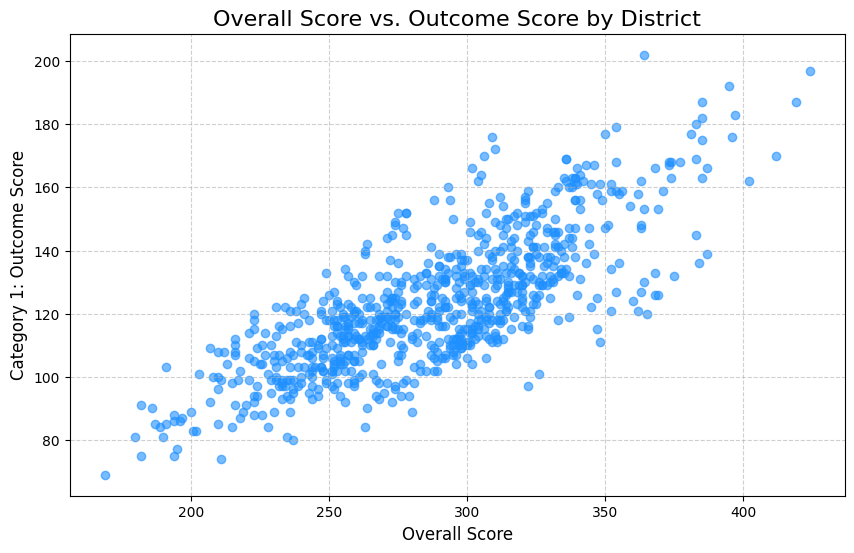

/tmp/ipython-input-3946292787.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=grades, patch_artist=True,


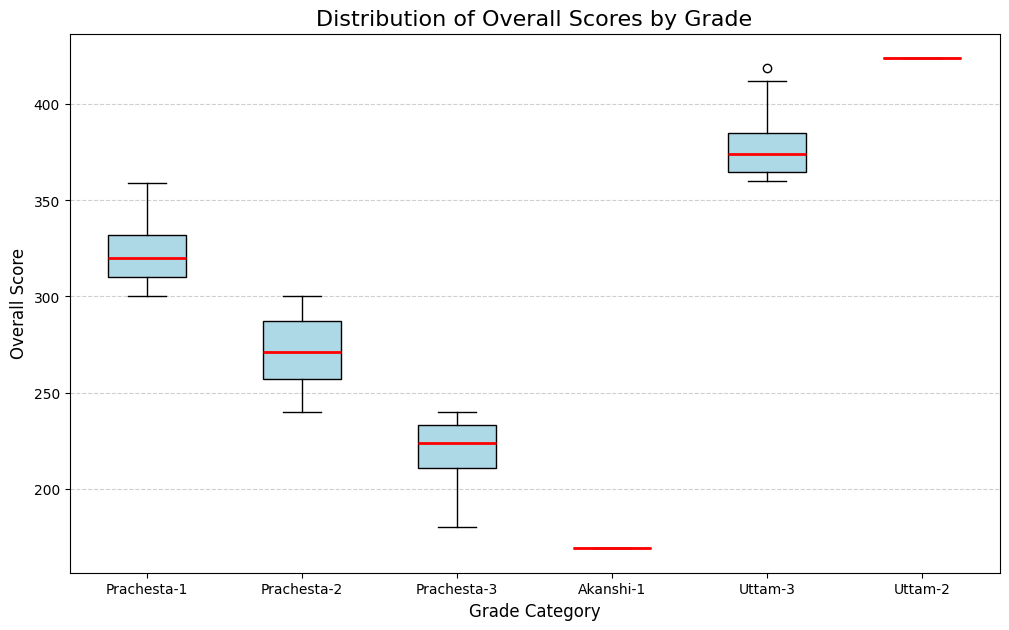

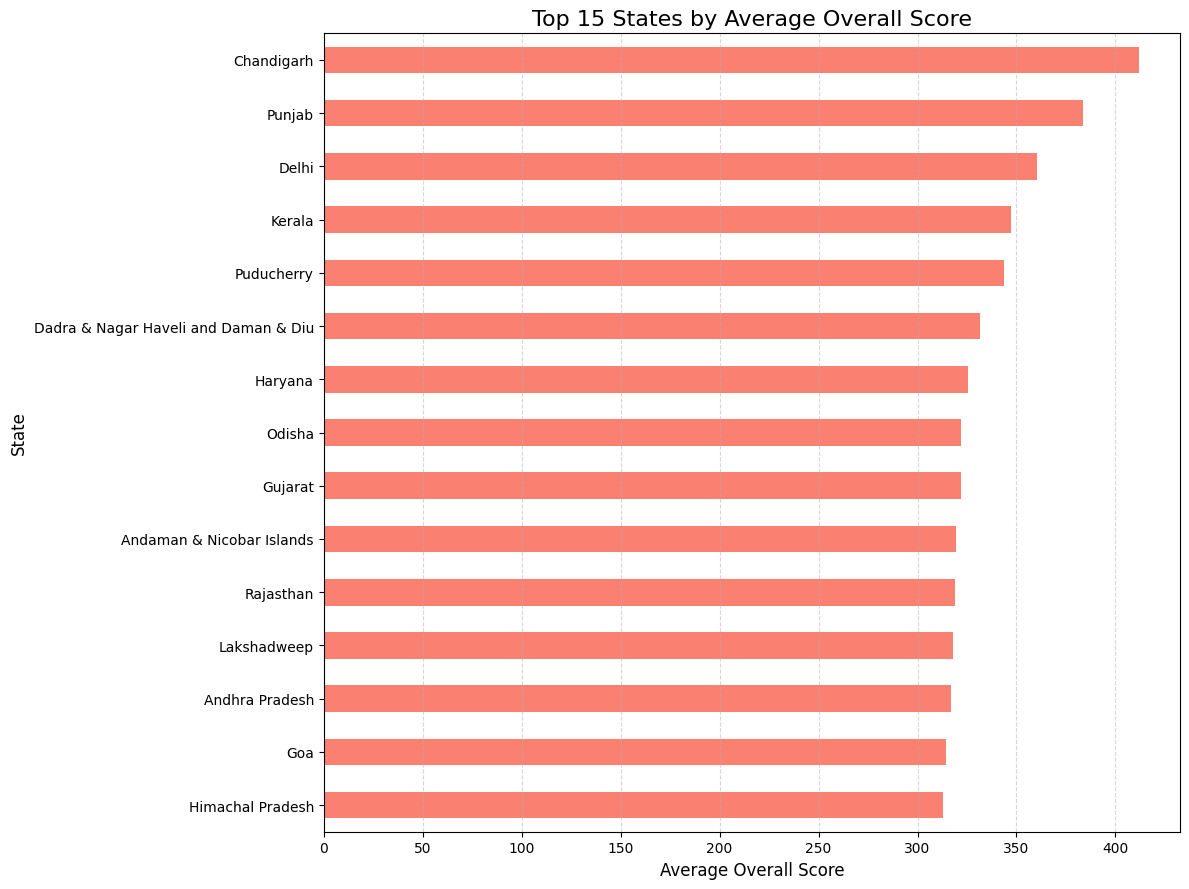

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Data Loading ---
# IMPORTANT: Before running this cell, you must upload your CSV file to Colab.
# 1. Click the "Files" icon on the left sidebar.
# 2. Click the "Upload to session storage" button (looks like a page with an up arrow).
# 3. Select the CSV file from your computer.
# 4. Once uploaded, change the file_path variable below to match your file's name.

try:
    # Replace 'your_uploaded_file.csv' with the actual name of your file
    file_path = '/content/datafile.csv'
    df = pd.read_csv(file_path)
    print(f"Successfully loaded '{file_path}'!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure you have uploaded the file and the name matches exactly.")
    # Create an empty DataFrame to prevent the rest of the script from crashing
    df = pd.DataFrame()


# --- 2. Data Cleaning and Preparation ---
# The script will only proceed if the dataframe was loaded successfully.
if not df.empty:
    # The original column names contain newlines and extra text. We'll clean them up.
    # This makes them much easier to work with in the code.
    df.rename(columns={
        'Categories - 1.\nOutcome (290)': 'Outcome',
        'Categories - 2. ECT (90)': 'ECT',
        'Categories - 3.\nIF&SE (51)': 'IF&SE',
        'Categories - 4.\nSS&CP (35)': 'SS&CP',
        'Categories - 5. DL (50)': 'DL',
        'Categories - 6. GP (84)': 'GP'
    }, inplace=True)

    # Convert all relevant score columns to numeric types, just in case they are read as text
    score_columns = ['Overall', 'Outcome', 'ECT', 'IF&SE', 'SS&CP', 'DL', 'GP']
    for col in score_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove any rows that might have missing values after conversion
    df.dropna(subset=score_columns, inplace=True)


    # --- 3. Basic Data Analysis ---
    print("\n--- First 5 rows of the cleaned dataset: ---")
    print(df.head())

    print("\n--- Data Types and Info: ---")
    df.info()

    print("\n--- Statistical Summary of Scores: ---")
    print(df[score_columns].describe())


    # --- 4. Matplotlib Visualizations ---

    # --- Scatter Plot ---
    # This plot explores the relationship between the main 'Outcome' score and the 'Overall' score.
    # This helps us see how strongly the performance in one category correlates with the total score.
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Overall'], df['Outcome'], alpha=0.6, color='dodgerblue')

    plt.title('Overall Score vs. Outcome Score by District', fontsize=16)
    plt.xlabel('Overall Score', fontsize=12)
    plt.ylabel('Category 1: Outcome Score', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # --- Box Plot ---
    # A box plot is perfect for comparing the distribution of 'Overall' scores across different Grades.
    # It clearly shows the median, spread, and potential outliers for each grade category.
    plt.figure(figsize=(12, 7))
    # We group the data by 'Grade' and create a list of 'Overall' scores for each group
    grades = df['Grade'].unique()
    data_to_plot = [df['Overall'][df['Grade'] == grade] for grade in grades]

    plt.boxplot(data_to_plot, labels=grades, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red', linewidth=2))

    plt.title('Distribution of Overall Scores by Grade', fontsize=16)
    plt.ylabel('Overall Score', fontsize=12)
    plt.xlabel('Grade Category', fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.show()

    # --- Bar Chart ---
    # This horizontal bar chart shows the average 'Overall' score for the top 15 performing states.
    # It gives a high-level overview of which states have the highest average scores.
    state_performance = df.groupby('State')['Overall'].mean().sort_values(ascending=False)
    top_states = state_performance.head(15)

    plt.figure(figsize=(12, 9))
    top_states.sort_values(ascending=True).plot(kind='barh', color='salmon')

    plt.title('Top 15 States by Average Overall Score', fontsize=16)
    plt.xlabel('Average Overall Score', fontsize=12)
    plt.ylabel('State', fontsize=12)
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
    plt.show()